In [9]:
from seismic_purifier import RepresentationLearningAutoencoder, RepresentationLearningDenoisingAutoencoder, RepresentationLearningAutoencoderEnsemble
from seismic_purifier import ClassifierAutocovariance, ClassifierAugmentationCrossCovariances, ClassifierRepresentationCrossCovariances
from kfold_tester import KFoldTester
from evaluator import Evaluator, CropOffsetFilter
from sklearn.metrics import auc

In [10]:
# Experiment name.
EXP_NAME = "exp_test"

# Should be RepresentationLearningAutoencoder, RepresentationLearningDenoisingAutoencoder or RepresentationLearningAutoencoderEnsemble
REPRESENTATION_LEARNING_MODEL_CLASS = RepresentationLearningAutoencoder
CLASSIFIER_MODEL_CLASS = ClassifierAutocovariance

# Should be stead or instance.
TRAIN_DATASET = "stead"
TEST_DATASET = "stead"

# Number of epochs
EPOCHS = [6]

# Split.
SPLIT = 0

In [11]:
tester = KFoldTester(
    EXP_NAME,
    REPRESENTATION_LEARNING_MODEL_CLASS,
    CLASSIFIER_MODEL_CLASS,
    train_dataset=TRAIN_DATASET,
    test_dataset=TEST_DATASET,
    split=SPLIT,
    epochs=EPOCHS
)
tester.test()

In [12]:
filters = [CropOffsetFilter()]
evaluator = Evaluator(exp_name = EXP_NAME, 
                      representation_learning_model_class=REPRESENTATION_LEARNING_MODEL_CLASS, 
                      classifier_model_class = CLASSIFIER_MODEL_CLASS, 
                      train_dataset = TRAIN_DATASET, 
                      test_dataset = TEST_DATASET, 
                      filters = filters, 
                      epochs = EPOCHS, 
                      split = SPLIT,
                      method_params={})

In [13]:
roc_vectors = evaluator.get_roc_vectors()
fpr = roc_vectors[0]["fpr"]
tpr = roc_vectors[0]["tpr"]
roc_auc = auc(roc_vectors[0]["fpr"], roc_vectors[0]["tpr"])
print(roc_auc)

0.9820437332389175


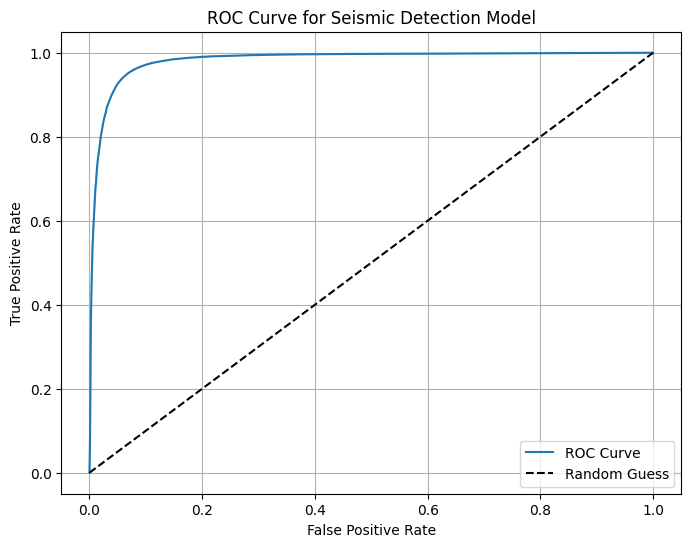

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for Seaborn
roc_data = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
})

plt.figure(figsize=(8, 6))
sns.lineplot(data=roc_data, x='False Positive Rate', y='True Positive Rate', label='ROC Curve')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Seismic Detection Model')
plt.legend()
plt.grid(True)
plt.show()